In [ ]:
import os, cv2
import numpy as np
import pandas as pd

DATA_DIRECTORY = "/content/gdrive/Shared drives/CS523/archive"

from google.colab import drive 
drive.mount('/content/gdrive')
#!ls "/content/gdrive/Shared drives/CS523/archive"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
metadata = pd.read_csv(os.path.join(DATA_DIRECTORY, 'metadata.csv'))

print(metadata)

     frame_id  sequence_id         tif_image_path              tif_mask_path  \
0           1            1    TIFF/Original/1.tif    TIFF/Ground Truth/1.tif   
1          10            1   TIFF/Original/10.tif   TIFF/Ground Truth/10.tif   
2         100            5  TIFF/Original/100.tif  TIFF/Ground Truth/100.tif   
3         101            5  TIFF/Original/101.tif  TIFF/Ground Truth/101.tif   
4         102            5  TIFF/Original/102.tif  TIFF/Ground Truth/102.tif   
..        ...          ...                    ...                        ...   
607        95            5   TIFF/Original/95.tif   TIFF/Ground Truth/95.tif   
608        96            5   TIFF/Original/96.tif   TIFF/Ground Truth/96.tif   
609        97            5   TIFF/Original/97.tif   TIFF/Ground Truth/97.tif   
610        98            5   TIFF/Original/98.tif   TIFF/Ground Truth/98.tif   
611        99            5   TIFF/Original/99.tif   TIFF/Ground Truth/99.tif   

           png_image_path             p

In [ ]:
# dataloader
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from torchvision import transforms, datasets, models
import glob
from sklearn.model_selection import train_test_split

class Polyp_Dataset(Dataset) :
    def __init__(self, metadata, transform = None) :
        self.image_paths = metadata['png_image_path'].tolist()
        self.mask_paths = metadata['png_mask_path'].tolist()
        self.transform = transform

    def __len__(self) :
        return len(self.image_paths)     

    def __getitem__(self, idx) :
        image_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]
        #index into path?
        image_FP = glob.glob((os.path.join(DATA_DIRECTORY, image_path)))
        mask_FP = glob.glob((os.path.join(DATA_DIRECTORY, mask_path)))
        print(image_FP)
        print(mask_FP)
        image = cv2.cvtColor(cv2.imread(image_FP[0]),cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(cv2.imread(mask_FP[0]),cv2.COLOR_BGR2RGB)
        
        if self.transform :
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask 

dataset = Polyp_Dataset(metadata=metadata)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
# print(dataset.getitem(0))

# train_set = dataset(2000, transform = trans)
# val_set = dataset(200, transform = trans)

# image_datasets = {
#     'train': train_set, 'val': val_set
# }
# random_state=42
# test_size=0.25
# xtrain, xtest, y_train, y_test = train_test_split(, y, test_size = test_size, train_size = 1-test_size, random_state = random_state)

dataloaders = {
    'train': DataLoader(train_dataset, batch_size=1 , shuffle=True, num_workers=0),
    'val': DataLoader(val_dataset, batch_size=1 , shuffle=True, num_workers=0)
}

In [ ]:
import matplotlib.pyplot as plt
def visualize(**images):
    """
    Plot images in one row
    """
    n_images = len(images)
    plt.figure(figsize=(20,8))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); 
        plt.yticks([])
        # get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(image)
    plt.show()    

['/content/gdrive/Shared drives/CS523/archive/PNG/Original/186.png']
['/content/gdrive/Shared drives/CS523/archive/PNG/Ground Truth/186.png']
[  0 255]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 

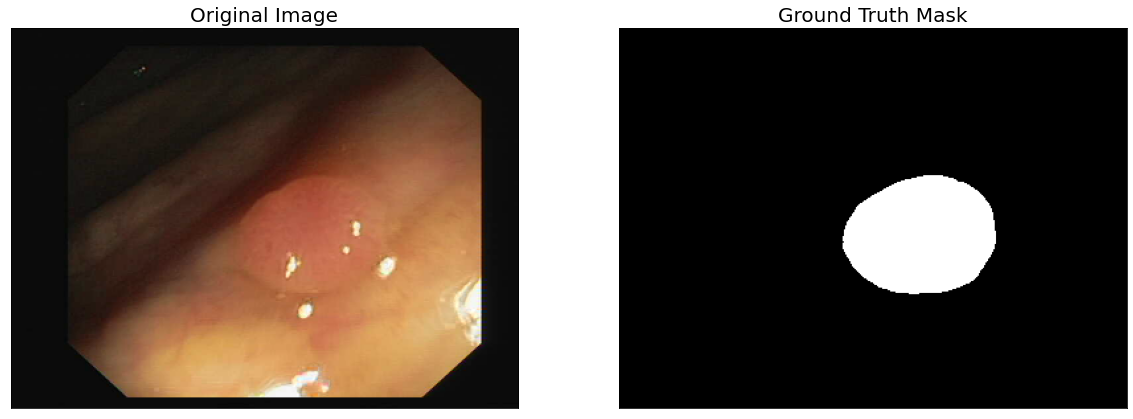

In [ ]:
dataset = Polyp_Dataset(metadata=metadata)
random_idx = np.random.randint(0, len(dataset)-1)
image, mask = dataset[random_idx]
visualize(
    original_image = image,
    ground_truth_mask = mask
)

In [ ]:
# from torch.utils.data import Dataset, DataLoader
# from torchvision import transforms, datasets, models

# class SimDataset(Dataset):
#     def __init__(self, count, transform=None):
#         self.input_images, self.target_masks = simulation.generate_random_data(192, 192, count=count)
#         self.transform = transform

#     def __len__(self):
#         return len(self.input_images)

#     def __getitem__(self, idx):
#         image = self.input_images[idx]
#         mask = self.target_masks[idx]
#         if self.transform:
#             image = self.transform(image)

#         return [image, mask]

# # use the same transformations for train/val in this example
# trans = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # imagenet
# ])

# train_set = SimDataset(2000, transform = trans)
# val_set = SimDataset(200, transform = trans)

# image_datasets = {
#     'train': train_set, 'val': val_set
# }

# batch_size = 25

# dataloaders = {
#     'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
#     'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
# }

In [ ]:
import torch
import torch.nn as nn
import copy
device = torch.device('cpu')
if torch.cuda.is_available():
  device = torch.device('cuda')

In [ ]:
class double_conv(nn.Module):
  def __init__(self, in_channels, out_channels):
    super().__init__()
    self.doubleconv = nn.Sequential(
        nn.Conv2d(in_channels,out_channels,kernel_size=3, stride=1,padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace = True),
        nn.Conv2d(out_channels,out_channels,kernel_size=3, stride=1,padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace = True))
    
  def forward(self,x):
    return self.doubleconv(x)

In [ ]:
class up_conv(nn.Module):
  def __init__(self,in_channels, out_channels):
    super().__init__()
    self.upconv = nn.ConvTranspose2d(in_channels,out_channels,kernel_size=2, stride=2)

  def forward(self, x, skip):
    x = self.upconv(x)
    x = torch.cat([x,skip],1) #does order matter?
    return x

In [ ]:
class Unet(nn.Module):
  def __init__(self):
    super().__init__()

    self.double1 = double_conv(3, 64)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.double2 = double_conv(64, 128)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.double3 = double_conv(128,256)
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.double4 = double_conv(256, 512)
    self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
    self.double5 = double_conv(512,1024)

    # Up
    self.up1 = up_conv(1024,512)
    self.updouble1 = double_conv(1024,512)
    self.up2 = up_conv(512,256)
    self.updouble2 = double_conv(512,256)
    self.up3 = up_conv(256,128)
    self.updouble3 = double_conv(256,128)
    self.up4 = up_conv(128,64)
    self.updouble4 = double_conv(128,64)

    # last convolution
    self.lastconv = nn.Conv2d(64,3,1)

  def forward(self, x):
    d1 = self.double1(x)
    d2 = self.double2(self.pool1(d1))
    d3 = self.double3(self.pool2(d2))
    d4 = self.double4(self.pool3(d3))
    print(d4.size())
    d5 = self.double5(self.pool4(d4))
    print(d5.size())
    # up bit - theres some concatenation involved. 
    u1_up = self.up1(d5,d4)
    print(u1_up.size())
    u1 = self.updouble1(u1_up)
    u2 = self.updouble2(self.up2(u1,d3))
    u3 = self.updouble3(self.up3(u2,d2))
    u4 = self.updouble4(self.up4(u3,d1))
    u_final = self.lastconv(u4)

    return u_final

  

In [ ]:
model = Unet()

# x = torch.randn(size=(1, 3, 512, 512), dtype=torch.float32)
# with torch.no_grad():
#     out = model(x)

# print(f'Out: {out.shape}')

In [ ]:
from torchsummary import summary
summary(model, input_size= (3, 224, 224))

torch.Size([2, 512, 28, 28])
torch.Size([2, 1024, 14, 14])
torch.Size([2, 1024, 28, 28])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
            Conv2d-4         [-1, 64, 224, 224]          36,928
       BatchNorm2d-5         [-1, 64, 224, 224]             128
              ReLU-6         [-1, 64, 224, 224]               0
       double_conv-7         [-1, 64, 224, 224]               0
         MaxPool2d-8         [-1, 64, 112, 112]               0
            Conv2d-9        [-1, 128, 112, 112]          73,856
      BatchNorm2d-10        [-1, 128, 112, 112]             256
             ReLU-11        [-1, 128, 112, 112]               0
           Conv2d-12        [-1, 128, 112, 112]         147,584
      BatchNor

In [ ]:
def dice_loss(pred, target, smooth = 1.):
    pred = pred.contiguous()
    target = target.contiguous()    

    intersection = (pred * target).sum(dim=2).sum(dim=2)
    
    loss = (1 - ((2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth)))
    
    return loss.mean()

In [ ]:
from collections import defaultdict
import torch.nn.functional as F

def calc_loss(pred, target, metrics, bce_weight=0.5):
    bce = F.binary_cross_entropy_with_logits(pred, target)

    pred = F.sigmoid(pred)
    dice = dice_loss(pred, target)

    loss = bce * bce_weight + dice * (1 - bce_weight)

    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)

    return loss

def print_metrics(metrics, epoch_samples, phase):
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))

    print("{}: {}".format(phase, ", ".join(outputs)))

In [ ]:
def train_model(model, optimizer, scheduler, num_epochs=2):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                for param_group in optimizer.param_groups:
                    print("LR", param_group['lr'])

                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            metrics = defaultdict(float)
            epoch_samples = 0

            for inputs, labels in dataloaders[phase]:
                print(inputs.type())
                print(labels.type())
                inputs = torch.transpose(inputs,1,3).float().to(device)
                labels = torch.transpose(labels,1,3).float().to(device)
                print(inputs.type())
                print(labels.type())
                print(inputs.shape)
                print(labels.shape)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = calc_loss(outputs, labels, metrics)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                epoch_samples += inputs.size(0)

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples

            # deep copy the model
            if phase == 'val' and epoch_loss < best_loss:
                print("saving best model")
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())
    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum =0.9, weight_decay=5e-4)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[1], gamma=0.1)
best_model = train_model(model,optimizer,scheduler)

Epoch 0/1
----------
LR 0.010000000000000002
['/content/gdrive/Shared drives/CS523/archive/PNG/Original/133.png']
['/content/gdrive/Shared drives/CS523/archive/PNG/Ground Truth/133.png']


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


torch.ByteTensor
torch.ByteTensor
torch.FloatTensor
torch.FloatTensor
torch.Size([1, 3, 384, 288])
torch.Size([1, 3, 384, 288])
torch.Size([1, 512, 48, 36])
torch.Size([1, 1024, 24, 18])
torch.Size([1, 1024, 48, 36])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


['/content/gdrive/Shared drives/CS523/archive/PNG/Original/82.png']
['/content/gdrive/Shared drives/CS523/archive/PNG/Ground Truth/82.png']
torch.ByteTensor
torch.ByteTensor
torch.FloatTensor
torch.FloatTensor
torch.Size([1, 3, 384, 288])
torch.Size([1, 3, 384, 288])
torch.Size([1, 512, 48, 36])
torch.Size([1, 1024, 24, 18])
torch.Size([1, 1024, 48, 36])
['/content/gdrive/Shared drives/CS523/archive/PNG/Original/441.png']
['/content/gdrive/Shared drives/CS523/archive/PNG/Ground Truth/441.png']
torch.ByteTensor
torch.ByteTensor
torch.FloatTensor
torch.FloatTensor
torch.Size([1, 3, 384, 288])
torch.Size([1, 3, 384, 288])
torch.Size([1, 512, 48, 36])
torch.Size([1, 1024, 24, 18])
torch.Size([1, 1024, 48, 36])
['/content/gdrive/Shared drives/CS523/archive/PNG/Original/28.png']
['/content/gdrive/Shared drives/CS523/archive/PNG/Ground Truth/28.png']
torch.ByteTensor
torch.ByteTensor
torch.FloatTensor
torch.FloatTensor
torch.Size([1, 3, 384, 288])
torch.Size([1, 3, 384, 288])
torch.Size([1, 5

In [ ]:
testtensor = torch.zeros([1,288,384,3])
print(torch.transpose(testtensor,1,3).shape)

torch.Size([1, 3, 384, 288])
